In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ultrasound_dataset import USDataset, Moco2TrainTransforms, Moco2EvalTransforms

from torchvision import transforms

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import SimpleITK as sitk
import numpy as np

import pickle

/work/jprieto/install/anaconda3/envs/us/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mount_point = '/work/jprieto/data/remote/GWH/Groups/FAMLI/Shared/C1_ML_Analysis'
df_test = pd.read_csv(os.path.join(mount_point, 'CSV_files', 'c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_test.csv'))

feat_fn = os.path.join(mount_point, 'test_output/ga3d/', 'v1/epoch=105-val_loss=179.60/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_test.pickle')
x, x_a, x_s, x_v, x_v_p = pickle.load(open(feat_fn, 'rb'))

In [4]:
df_test

,Unnamed: 0.1,Unnamed: 0,PID,PIDscan,PID_date,PID_date_time,study_dttm,content_dttm,path,file,...,fetal_anomaly,study_finding,study_lim,study_comments,is_anchor,ga_boe,ga_expert,ga_absdiff,ga_boe_w,is_ga_anchor
0,0,0,FAM-025-0453,FAM-025-0453-5,FAM-025-0453-5_20191106,FAM-025-0453-5_20191106_111051,2019-11-06 11:10:51,2019-11-06 11:34:44,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.347.59684.3586430.11...,...,0,us_none,0,NaN,0.0,255.726434,.,.,36.532348,0.0
1,1,1,FAM-025-0453,FAM-025-0453-5,FAM-025-0453-5_20191106,FAM-025-0453-5_20191106_111051,2019-11-06 11:10:51,2019-11-06 11:35:08,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.347.59708.1032022.11...,...,0,us_none,0,NaN,0.0,255.726434,.,.,36.532348,0.0
2,2,2,FAM-025-0453,FAM-025-0453-5,FAM-025-0453-5_20191106,FAM-025-0453-5_20191106_111051,2019-11-06 11:10:51,2019-11-06 11:35:38,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.347.59738.7503747.11...,...,0,us_none,0,NaN,0.0,255.726434,.,.,36.532348,0.0
3,3,3,FAM-025-0453,FAM-025-0453-5,FAM-025-0453-5_20191106,FAM-025-0453-5_20191106_111051,2019-11-06 11:10:51,2019-11-06 11:36:03,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.347.59763.7081666.11...,...,0,us_none,0,NaN,0.0,255.726434,.,.,36.532348,0.0
4,4,4,FAM-025-0453,FAM-025-0453-5,FAM-025-0453-5_20191106,FAM-025-0453-5_20191106_111051,2019-11-06 11:10:51,2019-11-06 11:36:30,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.347.59790.6585239.11...,...,0,us_none,0,NaN,0.0,255.726434,.,.,36.532348,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520,18056,19183,VIL-0594,VIL-0594-3,VIL-0594-3_20190822,VIL-0594-3_20190822_094717,2019-08-22 09:47:17,2019-08-22 09:53:57,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.270.50037.2875334.11...,...,0,NaN,0,NaN,0.0,231.000000,241.30862,10.3086199999999,33.000000,0.0
3521,18057,19184,VIL-0594,VIL-0594-3,VIL-0594-3_20190822,VIL-0594-3_20190822_094717,2019-08-22 09:47:17,2019-08-22 09:54:14,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.270.50054.2647455.11...,...,0,NaN,0,NaN,0.0,231.000000,241.30862,10.3086199999999,33.000000,0.0
3522,18058,19185,VIL-0594,VIL-0594-3,VIL-0594-3_20190822,VIL-0594-3_20190822_094717,2019-08-22 09:47:17,2019-08-22 09:59:10,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.270.50350.3307258.11...,...,0,NaN,0,NaN,0.0,231.000000,241.30862,10.3086199999999,33.000000,0.0
3523,18059,19186,VIL-0594,VIL-0594-3,VIL-0594-3_20190822,VIL-0594-3_20190822_094717,2019-08-22 09:47:17,2019-08-22 09:59:40,W:\Groups\FAMLI\Restricted_access_data\Ultraso...,1.2.276.0.26.1.1.1.2.2019.270.50380.4456055.11...,...,0,NaN,0,NaN,0.0,231.000000,241.30862,10.3086199999999,33.000000,0.0


In [18]:
df_group = df_test.groupby('StudyID')
ga_boe = []

for key, dfg in df_group:
    ga_boe.append({'StudyID': key, 'ga_boe': float(dfg['ga_boe'].unique()[0])})


In [22]:
ga_boe = pd.DataFrame(ga_boe)
ga_boe = x.reshape(-1)

In [ ]:

img1, img2 = test_ds[np.random.randint(len(test_ds))]
img1 = img1.permute(1,2,0).numpy()
img2 = img2.permute(1,2,0).numpy()

# img1 = ((img1 - np.min(img1))/(np.max(img1) - np.min(img1)))*255
# img2 = ((img2 - np.min(img2))/(np.max(img2) - np.min(img2)))*255
img1 *= 255
img2 *= 255

fig = px.imshow(np.array([img1, img2]), facet_col=0, binary_string=True, height=512)        
fig

In [144]:

df_full = pd.read_csv(os.path.join(mount_point, 'CSV_files', 'c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_st_tt_morethan3_test.csv'))

feat_full_fn = os.path.join(mount_point, 'test_output/ga3d/st_tt_count3/v1/epoch=607-val_loss=65.28/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_st_tt_morethan3_test.pickle')
x, x_a, x_s, x_v, x_v_p = pickle.load(open(feat_full_fn, 'rb'))

In [145]:
ga_column = 'ga_boe'
id_column = 'StudyID'

df_groups = df_full.groupby(id_column)
df_g = []
for k in df_groups.groups.keys():
    df_group = df_groups.get_group(k)
    ga = float(df_group[ga_column].unique()[0])
    study_dttm = df_group['study_dttm'].unique()[0]
    Manufacturer = df_group['Manufacturer'].unique()[0]
    df_g.append({id_column: k, ga_column: ga, 'study_dttm': study_dttm, 'Manufacturer': Manufacturer})
df_g = pd.DataFrame(df_g)

In [146]:
df_g['pred'] = x.reshape(-1)
df_g['error'] = df_g['pred'] - df_g[ga_column]
df_g['abs'] = abs(df_g['error'])

In [169]:
df_g['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    638.000000
mean       6.252366
std        5.551887
min        0.040089
25%        2.280634
50%        4.977472
75%        8.704305
95%       16.014597
99%       26.960113
max       51.123138
Name: abs, dtype: float64

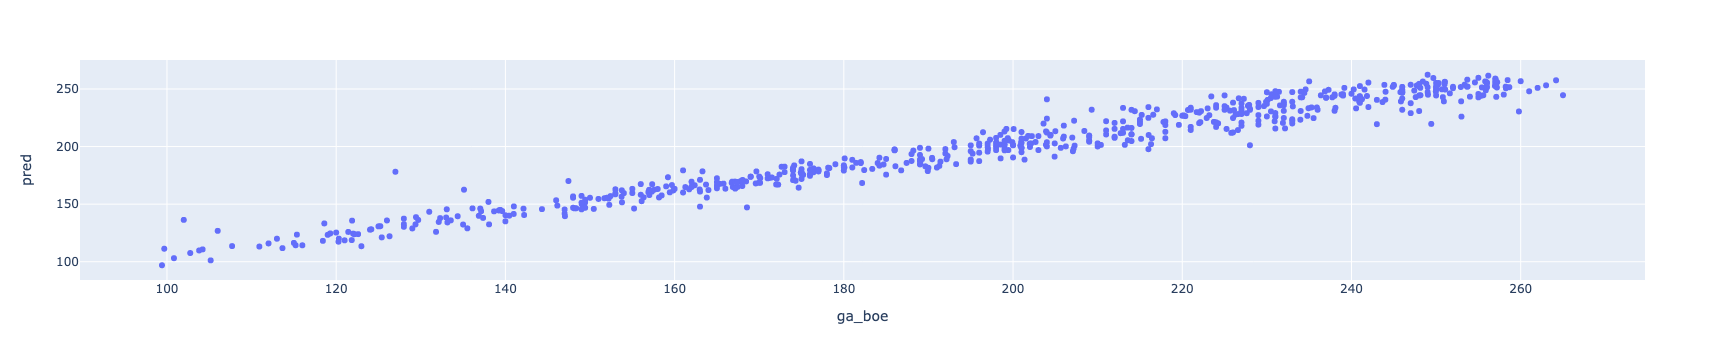

In [148]:
fig = px.scatter(df_g, x="ga_boe", y="pred")
fig

In [172]:
df_g['trimester'] = (df_g['ga_boe'] >= 196) + 2

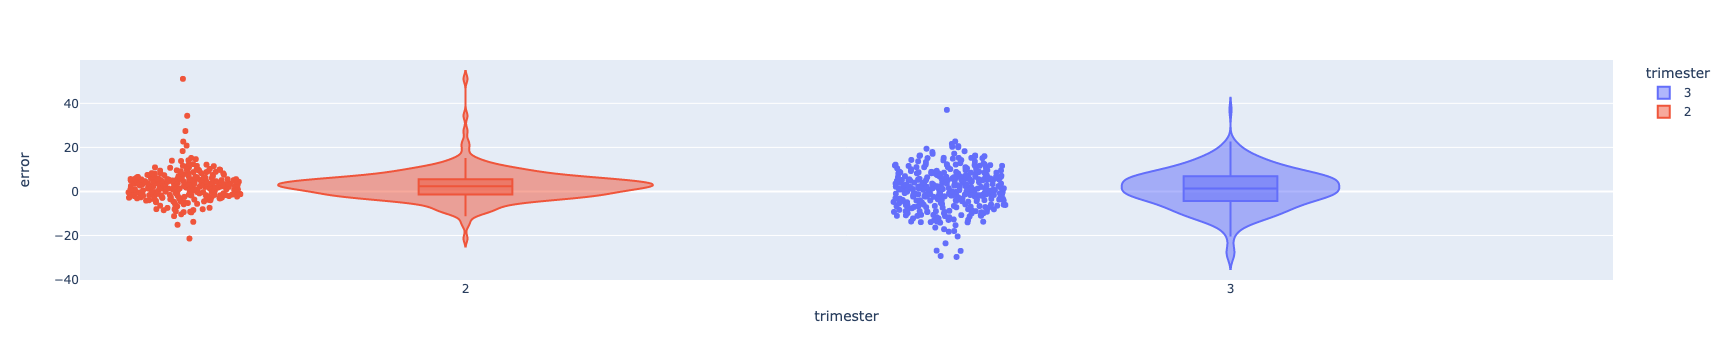

In [176]:
fig = px.violin(df_g, y="error", x='trimester', color="trimester", box=True, points="all")
fig

In [184]:
df_st = df_g.query('ga_boe < 196')
df_st['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    280.000000
mean       5.141240
std        5.241571
min        0.092834
25%        2.009614
50%        3.836916
75%        6.629471
95%       12.511418
99%       23.640096
max       51.123138
Name: abs, dtype: float64

In [185]:
df_tt = df_g.query('ga_boe >= 196')
df_tt['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    358.000000
mean       7.121403
std        5.639300
min        0.040089
25%        2.712048
50%        5.983473
75%        9.933550
95%       17.150433
99%       26.937472
max       37.025024
Name: abs, dtype: float64

In [126]:
folds = ["test_output/ga3d/fold0/epoch=533-val_loss=95.78/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_trainfold0_test.pickle",
"test_output/ga3d/fold1/epoch=656-val_loss=70.29/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_trainfold1_test.pickle",
"test_output/ga3d/fold2/epoch=696-val_loss=69.60/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_trainfold2_test.pickle",
"test_output/ga3d/fold3/epoch=648-val_loss=62.30/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_trainfold3_test.pickle",
"test_output/ga3d/fold4/epoch=462-val_loss=72.84/c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_trainfold4_test.pickle"]


In [139]:
x = []
x_a = []
x_s = []
x_v = []
x_v_p = []

df_folds = []

for f in folds:
    x_, x_a_, x_s_, x_v_, x_v_p_ = pickle.load(open(os.path.join(mount_point, f), 'rb'))
    
    x.append(x_)
    x_a.append(x_a)
    x_s.append(x_s_)
    x_v.append(x_v_)
    x_v_p.append(x_v_p_)
    
    df_test = pd.read_csv(os.path.join(mount_point, 'CSV_files', os.path.basename(f).replace(".pickle", ".csv")))
    
    df_groups = df_test.groupby(id_column)
    df_g = []
    for k in df_groups.groups.keys():
        df_group = df_groups.get_group(k)
        ga = float(df_group[ga_column].unique()[0])
        study_dttm = df_group['study_dttm'].unique()[0]
        Manufacturer = df_group['Manufacturer'].unique()[0]
        df_g.append({id_column: k, ga_column: ga, 'study_dttm': study_dttm, 'Manufacturer': Manufacturer})
        
    df_g = pd.DataFrame(df_g)
    df_g['pred'] = x_.reshape(-1)
    
    df_folds.append(df_g)


In [141]:
df_folds = pd.concat(df_folds)

In [142]:
df_folds

,StudyID,ga_boe,study_dttm,Manufacturer,pred
0,FAM-025-0605-5,209.695665,2019-11-29 12:21:52,GE Healthcare,218.407700
1,FAM-025-0605-6,254.695665,2020-01-13 11:19:08,GE Healthcare,253.376862
2,FAM-025-0650-2,237.731427,2019-11-18 13:49:51,GE Healthcare,241.041504
3,FAM-025-0659-4,169.522678,2019-11-06 13:23:09,GE Healthcare,169.788361
4,FAM-025-0659-5,197.522678,2019-12-04 11:37:44,GE Healthcare,191.629028
...,...,...,...,...,...
642,VIL-0317-2,170.000000,2019-04-22 15:06:05,GE Healthcare Austria GmbH & Co OG,173.875992
643,VIL-0317-3,198.000000,2019-05-20 10:49:03,GE Healthcare Austria GmbH & Co OG,204.365631
644,VIL-0317-4,228.000000,2019-06-19 14:53:25,GE Healthcare Austria GmbH & Co OG,238.170456
645,VIL-0414-3,128.000000,2019-05-10 14:24:38,GE Healthcare Austria GmbH & Co OG,128.967270


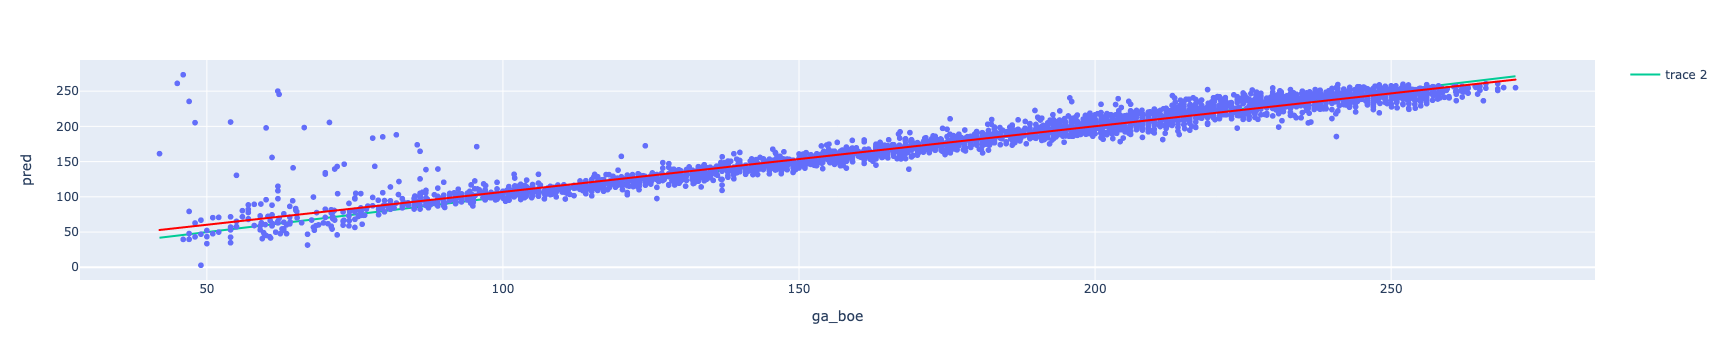

In [183]:
fig = px.scatter(df_folds, x="ga_boe", y="pred", trendline='ols', trendline_color_override="red")
fig.add_trace(go.Scatter(x=df_folds["ga_boe"], y=df_folds["ga_boe"]))
fig

In [150]:
df_folds['error'] = df_folds['pred'] - df_folds[ga_column]
df_folds['abs'] = abs(df_folds['error'])

In [177]:
df_folds['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    3358.000000
mean        7.682690
std        12.324679
min         0.010965
25%         2.403664
50%         5.258935
75%         9.454639
95%        19.752784
99%        41.701826
max       227.278046
Name: abs, dtype: float64

In [165]:
df_folds.query('abs < 14').reset_index(drop=True).to_csv(os.path.join(mount_point, 'CSV_files', 'c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_clean_studyid.csv'))

In [167]:
df_folds.query('abs >= 14').reset_index(drop=True).to_csv(os.path.join(mount_point, 'CSV_files', 'c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_notclean_studyid.csv'))

In [187]:
df_folds.query('abs >= 30')

,StudyID,ga_boe,study_dttm,Manufacturer,pred,error,abs
131,FAM-025-1500-1,47.000000,2021-02-04 11:45:54,GE Healthcare,235.406250,188.406250,188.406250
148,FAM-025-1569-1,95.571143,2021-03-30 11:45:27,GE Healthcare,171.242737,75.671594,75.671594
151,FAM-025-1593-1,124.043590,2021-04-14 11:09:22,GE Healthcare,172.436783,48.393192,48.393192
209,FAM-025-1875-1,42.000000,2021-11-23 13:10:40,GE Healthcare,161.305450,119.305450,119.305450
228,FAM-025-2030-1,66.441037,2022-02-22 11:16:59,GE Healthcare,198.342438,131.901401,131.901401
231,FAM-025-2059-1,240.757250,2022-03-15 09:29:30,GE Healthcare,185.593109,-55.164141,55.164141
232,FAM-025-2064-1,64.557706,2022-04-01 10:00:54,GE Healthcare,141.131317,76.573611,76.573611
233,FAM-025-2070-1,59.124944,2022-04-05 10:47:19,GE Healthcare,89.799934,30.674990,30.674990
323,UNC-0193-1,67.000000,2019-02-05 12:14:30,GE Healthcare Austria GmbH & Co OG,31.572721,-35.427279,35.427279
388,UNC-0474-1,55.000000,2019-10-31 15:39:35,GE Healthcare Austria GmbH & Co OG,130.479477,75.479477,75.479477


In [188]:
df_folds.query('abs >= 20 and ga_boe >= 98')

,StudyID,ga_boe,study_dttm,Manufacturer,pred,error,abs
23,FAM-025-0786-2,213.529018,2019-11-13 11:03:01,GE Healthcare,234.216949,20.687931,20.687931
44,FAM-025-0880-3,213.425303,2020-02-27 12:12:09,GE Healthcare,240.366547,26.941244,26.941244
57,FAM-025-0954-1,204.235303,2020-01-29 10:20:23,GE Healthcare,178.414200,-25.821103,25.821103
65,FAM-025-0973-2,227.274176,2020-03-05 12:02:16,GE Healthcare,248.639343,21.365167,21.365167
106,FAM-025-1350-3,166.802783,2021-03-24 12:35:40,GE Healthcare,189.161652,22.358869,22.358869
...,...,...,...,...,...,...,...
533,UNC-0793-2,203.000000,2021-11-12 16:11:40,GE Healthcare Austria GmbH & Co OG,182.686142,-20.313858,20.313858
534,UNC-0793-3,224.000000,2021-12-03 12:07:48,GE Healthcare Austria GmbH & Co OG,197.532547,-26.467453,26.467453
560,UNC-0821-2,127.000000,2021-11-16 13:02:13,GE Healthcare Austria GmbH & Co OG,148.547241,21.547241,21.547241
605,UNC-0877-5,159.000000,2022-03-11 13:03:30,GE Healthcare Austria GmbH & Co OG,180.108810,21.108810,21.108810


In [257]:
clean_test_fn = os.path.join(mount_point, 'CSV_files', 'c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_clean_test.csv')
df_clean_test = pd.read_csv(clean_test_fn)

clean_feat_fn = os.path.join(mount_point, 'C1_ML_Analysis/test_output/ga3d/clean/epoch=680-val_loss=51.97', os.path.basename(clean_test_fn).replace('.csv', '.pickle'))
x, x_a, x_s, x_v, x_v_p = pickle.load(open(clean_feat_fn, 'rb'))


df_clean_groups = df_clean_test.groupby(id_column)
df_clean_g = []
for k in df_clean_groups.groups.keys():
    df_group = df_clean_groups.get_group(k)
    ga = float(df_group[ga_column].unique()[0])
    study_dttm = df_group['study_dttm'].unique()[0]
    Manufacturer = df_group['Manufacturer'].unique()[0]
    df_clean_g.append({id_column: k, ga_column: ga, 'study_dttm': study_dttm, 'Manufacturer': Manufacturer})
df_clean_g = pd.DataFrame(df_clean_g)
df_clean_g['pred'] = x.reshape(-1)
df_clean_g['error'] = df_clean_g['pred'] - df_clean_g[ga_column]
df_clean_g['abs'] = abs(df_clean_g['error'])

In [258]:
df_clean_g['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    594.000000
mean       6.031626
std        5.112643
min        0.025660
25%        2.132271
50%        4.885674
75%        8.263546
95%       15.476513
99%       23.043204
max       35.200453
Name: abs, dtype: float64

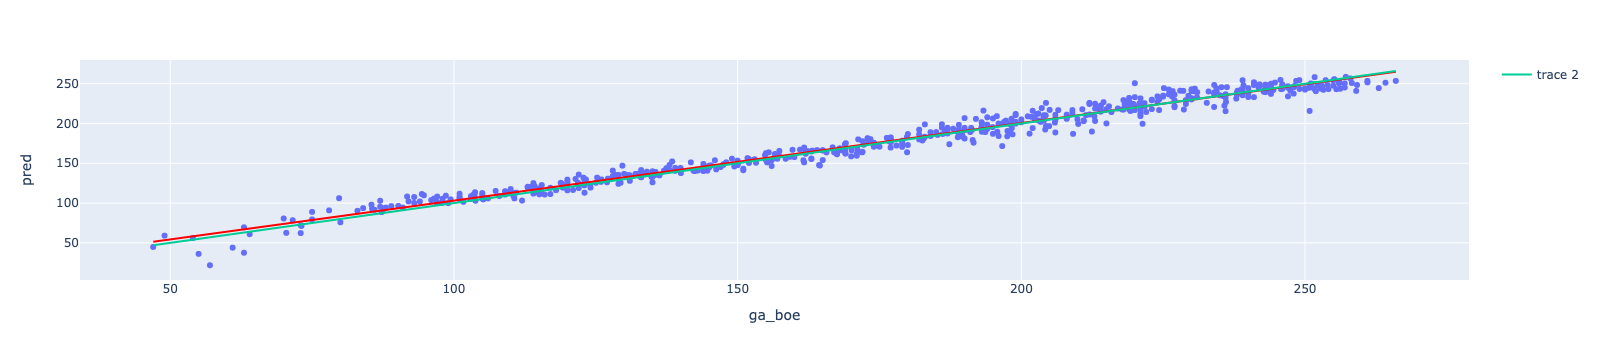

In [259]:
fig = px.scatter(df_clean_g, x="ga_boe", y="pred", trendline='ols', trendline_color_override="red")
fig.add_trace(go.Scatter(x=df_clean_g["ga_boe"], y=df_clean_g["ga_boe"]))
fig

In [260]:
df_ft = df_clean_g.query('ga_boe <= 99')
df_ft['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    51.000000
mean      9.182097
std       6.935964
min       0.865906
25%       4.288754
50%       7.322319
75%      11.786655
95%      22.191772
99%      30.767218
max      35.200453
Name: abs, dtype: float64

In [261]:
df_st = df_clean_g.query('99 < ga_boe and ga_boe < 196')
df_st['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    295.000000
mean       4.707306
std        3.892085
min        0.025660
25%        1.682549
50%        3.809464
75%        6.760411
95%       12.864323
99%       16.822584
max       22.893329
Name: abs, dtype: float64

In [262]:
df_tt = df_clean_g.query('ga_boe >= 196')
df_tt['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    248.000000
mean       6.959048
std        5.475238
min        0.035484
25%        2.938655
50%        5.936815
75%       10.051201
95%       16.355207
99%       23.873546
max       35.005134
Name: abs, dtype: float64

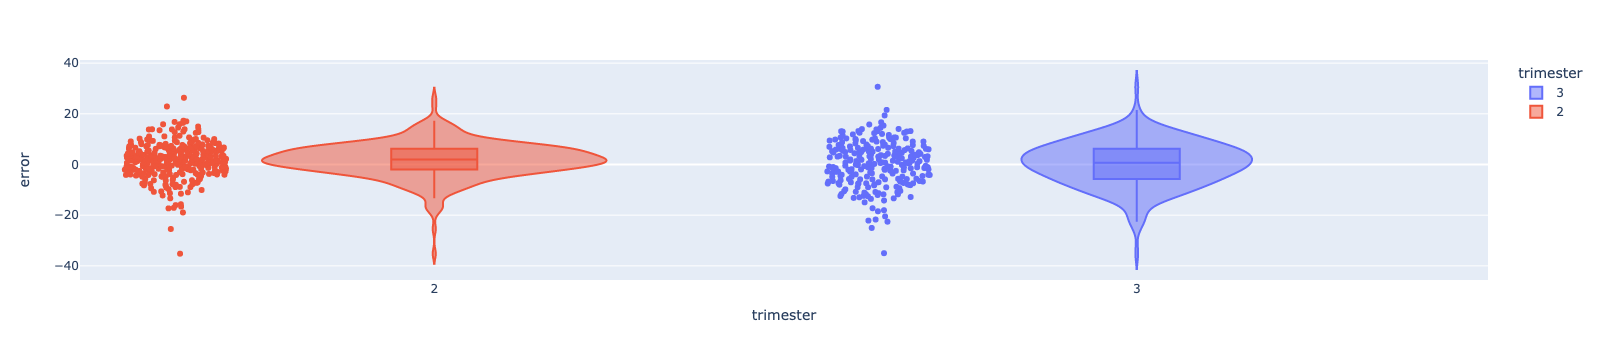

In [263]:
df_clean_g['trimester'] = (df_clean_g['ga_boe'] >= 196) + 2
fig = px.violin(df_clean_g, y="error", x='trimester', color="trimester", box=True, points="all")
fig

In [264]:
clean_test_fn = os.path.join(mount_point, 'CSV_files', 'c1_volumes_ga_boe_20220811_masked_resampled_128_spc075_notna_clean_test.csv')
df_clean_test = pd.read_csv(clean_test_fn)

clean_feat_fn = os.path.join(mount_point, 'C1_ML_Analysis/test_output/ga3d/clean_l1/epoch=730-val_loss=5.17', os.path.basename(clean_test_fn).replace('.csv', '.pickle'))
x, x_a, x_s, x_v, x_v_p = pickle.load(open(clean_feat_fn, 'rb'))


df_clean_groups = df_clean_test.groupby(id_column)
df_clean_g = []
for k in df_clean_groups.groups.keys():
    df_group = df_clean_groups.get_group(k)
    ga = float(df_group[ga_column].unique()[0])
    study_dttm = df_group['study_dttm'].unique()[0]
    Manufacturer = df_group['Manufacturer'].unique()[0]
    df_clean_g.append({id_column: k, ga_column: ga, 'study_dttm': study_dttm, 'Manufacturer': Manufacturer})
df_clean_g = pd.DataFrame(df_clean_g)
df_clean_g['pred'] = x.reshape(-1)
df_clean_g['error'] = df_clean_g['pred'] - df_clean_g[ga_column]
df_clean_g['abs'] = abs(df_clean_g['error'])
df_clean_g['score'] = [np.max(s) for s in x_s]
df_clean_g['score_sd'] = [np.std(s) for s in x_s]

In [265]:
df_clean_g['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    594.000000
mean       5.264419
std        4.937225
min        0.000793
25%        1.752353
50%        4.006615
75%        7.181285
95%       14.444299
99%       22.962657
max       40.272263
Name: abs, dtype: float64

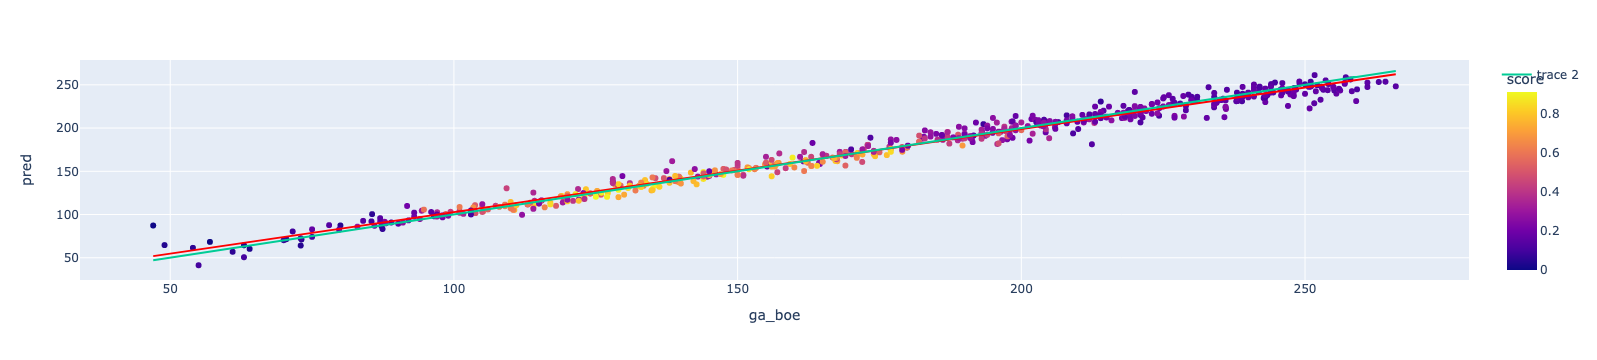

In [266]:
fig = px.scatter(df_clean_g, x="ga_boe", y="pred", trendline='ols', trendline_color_override="red", color='score')
fig.add_trace(go.Scatter(x=df_clean_g["ga_boe"], y=df_clean_g["ga_boe"]))
fig

In [267]:
df_ft = df_clean_g.query('ga_boe <= 99')
df_ft['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    51.000000
mean      5.849963
std       6.783602
min       0.269076
25%       1.124710
50%       3.766323
75%       8.790282
95%      15.248782
99%      29.222642
max      40.272263
Name: abs, dtype: float64

In [268]:
df_st = df_clean_g.query('99 < ga_boe and ga_boe < 196')
df_st['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    295.000000
mean       4.334481
std        3.852889
min        0.003504
25%        1.548279
50%        3.400436
75%        6.054291
95%       11.939885
99%       16.882568
max       23.257248
Name: abs, dtype: float64

In [269]:
df_tt = df_clean_g.query('ga_boe >= 196')
df_tt['abs'].describe(percentiles=[.25, .5, .75, .95, .99])

count    248.000000
mean       6.250181
std        5.427579
min        0.000793
25%        2.251537
50%        4.987108
75%        8.724039
95%       15.893617
99%       25.635297
max       31.185054
Name: abs, dtype: float64

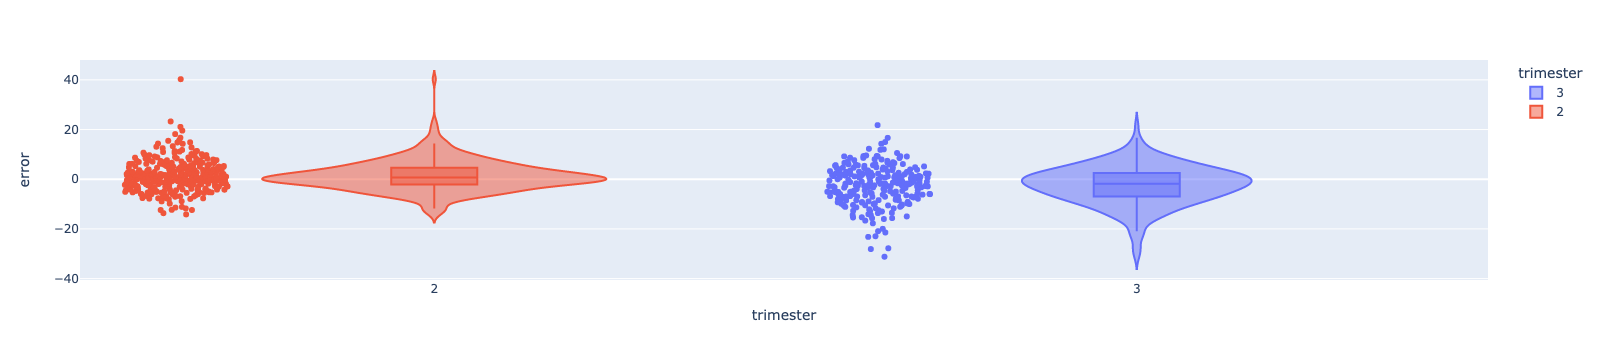

In [270]:
df_clean_g['trimester'] = (df_clean_g['ga_boe'] >= 196) + 2
fig = px.violin(df_clean_g, y="error", x='trimester', color="trimester", box=True, points="all")
fig